# Loading required libraries

In [154]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import json
import matplotlib.pyplot as plt
from shapely import geometry
from shapely.geometry import Polygon

# Importing Armenia Map Coordinates
https://github.com/nmandery/h3ronpy

In [155]:
gpdata=gpd.read_file(r"geojson\armenia.geojson")
gpdata.head()

,id,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,...,hasc_maybe,postal,sameascity,woe_name,latitude,longitude,admin,gn_a1_code,min_zoom,geometry
0,TV,Admin-1 scale rank,9,ARM-1670,1670,AM-TV,,AM,1,Tavush,...,,TV,-99,Tavush,40.8883,45.1763,Armenia,09,9,"POLYGON ((45.37346 40.65136, 45.37346 40.65136..."
1,LO,Admin-1 scale rank,9,ARM-1674,1674,AM-LO,,AM,1,Lori,...,,LO,-99,Lori,40.9347,44.4524,Armenia,06,9,"POLYGON ((44.85391 41.22350, 44.85391 41.22350..."
2,SH,Admin-1 scale rank,9,ARM-1555,1555,AM-SH,,AM,1,Shirak,...,,SH,-99,Shirak,40.8194,43.8178,Armenia,07,9,"POLYGON ((43.97766 41.16448, 43.97766 41.16319..."
3,GR,Admin-1 scale rank,9,ARM-1672,1672,AM-GR,,AM,1,Gegharkunik,...,,GR,-99,Gegharkunik,40.2780,45.3848,Armenia,04,9,"MULTIPOLYGON (((45.37346 40.65136, 45.37346 40..."
4,VD,Admin-1 scale rank,9,ARM-1733,1733,AM-VD,,AM,1,Vayots Dzor,...,,VD,-99,Vayots Dzor,39.7183,45.4421,Armenia,10,9,"POLYGON ((45.57774 39.98394, 45.57932 39.97020..."


In [156]:
gpdata.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

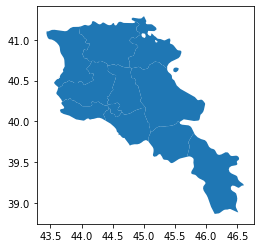

In [157]:
gpdata.plot()

In [159]:
xmin, ymin, xmax, ymax = gpdata.total_bounds

In [163]:
length = 1000
wide = 1000

#  Set up transformers: FROM>>>TO, EPSG:3857 is metric
to_proxy = pyproj.Transformer.from_crs('epsg:4326', 'epsg:3857')
to_original = pyproj.Transformer.from_crs('epsg:3857', 'epsg:4326')

transformed_sw = to_proxy.transform(xmin,ymin) # Transform NW point to 3857
transformed_ne = to_proxy.transform(xmax, ymax) # .. same for SE


cols = list(np.arange(transformed_sw[0], transformed_ne[0] + wide, wide))
rows = list(np.arange(transformed_sw[1], transformed_ne[1] + length, length))



# Grid loop

In [166]:
grid.head()

,geometry
0,"POLYGON ((43.43629 38.86370, 43.43629 38.87268..."
1,"POLYGON ((43.44282 38.86370, 43.44282 38.87268..."
2,"POLYGON ((43.44934 38.86370, 43.44934 38.87268..."
3,"POLYGON ((43.45586 38.86370, 43.45586 38.87268..."
4,"POLYGON ((43.46238 38.86370, 43.46238 38.87268..."


In [164]:
polygons = []
for x in cols[0:5]:
    for y in rows[0:5]:
        polygons.append(Polygon([to_original.transform(x, y), to_original.transform(x+wide, y), to_original.transform(x+wide, y+length), to_original.transform(x, y+length)]))

grid = gpd.GeoDataFrame({'geometry':polygons})
grid.to_file("grids.geojson", driver='GeoJSON')

# Visualizing

In [180]:
grid_geojson=gpd.read_file("grids.geojson")

cx=grid_geojson.centroid[round(len(grid_geojson.centroid)/2)].x
cy=grid_geojson.centroid[round(len(grid_geojson.centroid)/2)].y


C:\Users\user\AppData\Local\Temp/ipykernel_10804/1473447169.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cx=grid_geojson.centroid[round(len(grid_geojson.centroid)/2)].x
C:\Users\user\AppData\Local\Temp/ipykernel_10804/1473447169.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cx=grid_geojson.centroid[round(len(grid_geojson.centroid)/2)].x
C:\Users\user\AppData\Local\Temp/ipykernel_10804/1473447169.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cy=grid_geojson.centroid[round(len(grid_geojson.centroid)/2)].y
C:\Users\user\AppData\Local\Temp/ipykernel_10804/

In [183]:
import folium


map = folium.Map(location = [cx,cy], tiles='OpenStreetMap' , zoom_start = 15)


folium.GeoJson(
    data=grid_geojson,
    name='layerName',

).add_to(map)
map

#  Final Function

In [142]:
def grid(geodata=gpdata,height=50,width=50):
    #extracting the edpoints of the geodata
    xmin, ymin, xmax, ymax = geodata.total_bounds
   
    
    return "{0},{1},{2},{3}".format(ymin, xmin, ymax, xmax)

